# Nettoyer un texte: des exercices pour découvrir l’approche

bag-of-words

<p class="badges">

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/NLP/02_exoclean.ipynb" class="github"><i class="fab fa-github"></i></a>
<a href="https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/NLP/02_exoclean.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter" alt="Download"></a>
<a href="https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/NLP/02_exoclean.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter" alt="nbviewer"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABNLP%2002_exoclean%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&amp;color=yellow?logo=Python" alt="Onyxia"></a><br>
<a href="https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath={binder_path}" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=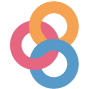" alt="Binder"></a>
<a href="http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/NLP/02_exoclean.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<a href="https://github.dev/linogaliana/python-datascientist/notebooks/course/NLP/02_exoclean.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc" alt="githubdev"></a>

</p>

</p>

Cette page approfondit certains aspects présentés dans la
[partie introductive](#nlp). Après avoir travaillé sur le
*Comte de Monte Cristo*, on va continuer notre exploration de la littérature
avec cette fois des auteurs anglophones :

-   Edgar Allan Poe, (EAP) ;
-   HP Lovecraft (HPL) ;
-   Mary Wollstonecraft Shelley (MWS).

Les données sont disponibles ici : [spooky.csv](https://github.com/GU4243-ADS/spring2018-project1-ginnyqg/blob/master/data/spooky.csv) et peuvent être requétées via l’url
<https://github.com/GU4243-ADS/spring2018-project1-ginnyqg/raw/master/data/spooky.csv>.

Le but va être dans un premier temps de regarder dans le détail les termes les plus fréquemment utilisés par les auteurs, de les représenter graphiquement.
On prendra appui sur l’approche *bag of words* présentée dans le chapitre précédent<a name="cite_ref-1"></a>[<sup>\[1\]</sup>](#cite_note-1).

L’approche *bag of words* est déjà, si on la pousse à ses limites, très intéressante. Elle peut notamment
faciliter la mise en cohérence de différents corpus
par la méthode des appariements flous
(cf. [Galiana and Castillo (2022)](https://epic-davinci-acb57b.netlify.app/#1).
Le [chapitre sur ElasticSearch](#elastic) présent dans cette partie du cours présente quelques
éléments de ce travail sur les données de l’`OpenFoodFacts`

Ce notebook est librement inspiré de :

-   https://www.kaggle.com/enerrio/scary-nlp-with-spacy-and-keras
-   https://github.com/GU4243-ADS/spring2018-project1-ginnyqg
-   https://www.kaggle.com/meiyizi/spooky-nlp-and-topic-modelling-tutorial/notebook

Les chapitres suivants permettront d’introduire aux enjeux de modélisation
de corpus textuels. Dans un premier temps, le modèle `LDA` permettra d’explorer
le principe des modèles bayésiens à couche cachées pour modéliser les sujets (*topics*)
présents dans un corpus et segmenter ces *topics* selon les mots qui les composent.

Le dernier chapitre de la partie visera à
prédire quel texte correspond à quel auteur à partir d’un modèle `Word2Vec`.
Cela sera un pas supplémentaire dans la formalisation puisqu’il s’agira de
représenter chaque mot d’un texte sous forme d’un vecteur de grande dimension, ce
qui nous permettra de rapprocher les mots entre eux dans un espace complexe.
Cette technique, dite des plongements de mots (*Word Embedding*),
permet ainsi de transformer une information complexe difficilement quantifiable
comme un mot
en un objet numérique qui peut ainsi être rapproché d’autres par des méthodes
algébriques. Pour découvrir ce concept, ce [post de blog](https://ssphub.netlify.app/post/word-embedding/)
est particulièrement utile. En pratique, la technique des
plongements de mots permet d’obtenir des tableaux comme celui-ci:

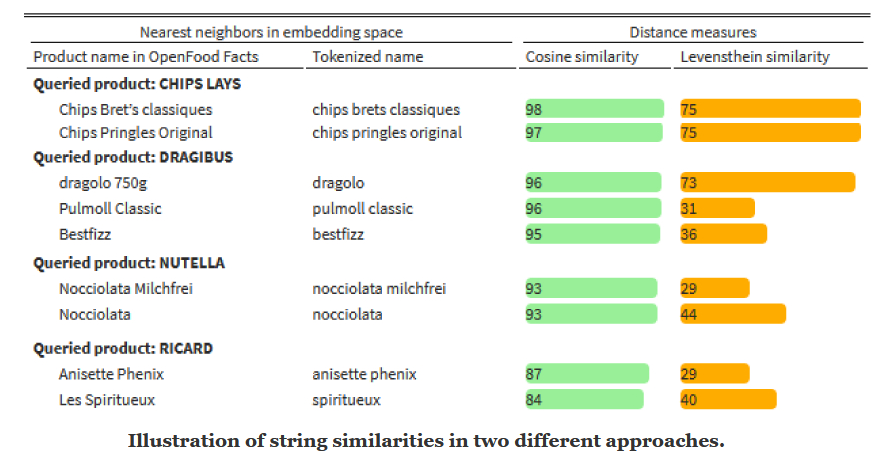

# Librairies nécessaires

Cette page évoquera les principales librairies pour faire du NLP, notamment :

-   [WordCloud](https://github.com/amueller/word_cloud)
-   [nltk](https://www.nltk.org/)
-   [SpaCy](https://spacy.io/)
-   [Keras](https://keras.io/)
-   [TensorFlow](https://www.tensorflow.org/)

Il faudra également installer les librairies `gensim` et `pywaffle`

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #ffc10780;">
<h3 class="alert-heading"><i class="fa fa-lightbulb-o"></i> Hint</h3>

Comme dans la [partie précédente](#nlp), il faut télécharger quelques éléments pour que `NTLK` puisse fonctionner correctement. Pour cela, faire :

``` python
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('genesis')
nltk.download('wordnet')
nltk.download('omw-1.4')
```

</div>

La liste des modules à importer est assez longue, la voici :

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import base64
import string
import re
import nltk

from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
#!pip install pywaffle
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('genesis')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /github/home/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /github/home/nltk_data...

[nltk_data]   Unzipping tokenizers/punkt.zip.

[nltk_data] Downloading package genesis to /github/home/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
[nltk_data] Downloading package wordnet to /github/home/nltk_data...

[nltk_data] Downloading package omw-1.4 to /github/home/nltk_data...

True

# Données utilisées

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 1 : Importer les données spooky</h3>

*Pour ceux qui ont envie de tester leurs connaissances en pandas*

1.  Importer le jeu de données `spooky` à partir de l’URL <https://github.com/GU4243-ADS/spring2018-project1-ginnyqg/raw/master/data/spooky.csv> sous le nom `train`. L’encoding est `latin-1`
2.  Mettre des majuscules au nom des colonnes.
3.  Retirer le prefix `id` de la colonne `Id` et appeler la nouvelle colonne `ID`.
4.  Mettre l’ancienne colonne `Id` en index.

</div>

Si vous ne faites pas l’exercice 1, pensez à charger les données en executant la fonction `get_data.py` :

In [8]:
import requests

url = 'https://raw.githubusercontent.com/linogaliana/python-datascientist/master/content/course/NLP/get_data.py'
r = requests.get(url, allow_redirects=True)
open('getdata.py', 'wb').write(r.content)

import getdata
train = getdata.create_train_dataframes()

Ce code introduit une base nommée `train` dans l’environnement.

Le jeu de données met ainsi en regard un auteur avec une phrase qu’il a écrite :

In [9]:
train.head()

On peut se rendre compte que les extraits des 3 auteurs ne sont
pas forcément équilibrés dans le jeu de données.
Il faudra en tenir compte dans la prédiction.

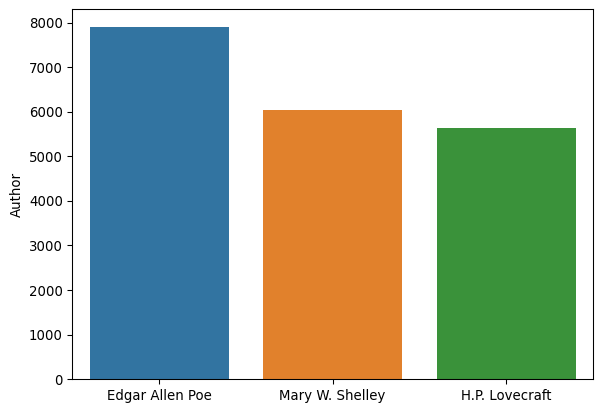

In [11]:
fig = plt.figure()
g = sns.barplot(x=['Edgar Allen Poe', 'Mary W. Shelley', 'H.P. Lovecraft'], y=train['Author'].value_counts())

<div class="alert alert-info" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #007bff80;">
<h3 class="alert-heading"><i class="fa fa-comment"></i> Note</h3>

L’approche *bag of words* est présentée de
manière plus extensive dans le [chapitre précédent](#nlp).

L’idée est d’étudier la fréquence des mots d’un document et la
surreprésentation des mots par rapport à un document de
référence (appelé *corpus*).

Cette approche un peu simpliste mais très
efficace : on peut calculer des scores permettant par exemple de faire
de classification automatique de document par thème, de comparer la
similarité de deux documents. Elle est souvent utilisée en première analyse,
et elle reste la référence pour l’analyse de textes mal
structurés (tweets, dialogue tchat, etc.).

Les analyses tf-idf (*term frequency-inverse document frequency*) ou les
constructions d’indices de similarité cosinus reposent sur ce type d’approche.

</div>

## Fréquence d’un mot

Avant de s’adonner à une analyse systématique du champ lexical de chaque
auteur, on se focaliser dans un premier temps sur un unique mot, le mot *fear*.

<div class="alert alert-comment" role="alert">
<h3 class="alert-heading"><i class="fa fa-comment"></i> Note</h3>

L’exercice ci-dessous présente une représentation graphique nommée
*waffle chart*. Il s’agit d’une approche préférable aux
camemberts qui sont des graphiques manipulables car l’oeil humain se laisse
facilement berner par cette représentation graphique qui ne respecte pas
les proportions.

</div>

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 2 : Fréquence d'un mot</h3>

1.  Compter le nombre de phrases, pour chaque auteur, où apparaît le mot `fear`.
2.  Utiliser `pywaffle` pour obtenir les graphiques ci-dessous qui résument
    de manière synthétique le nombre d’occurrences du mot *“fear”* par auteur.
3.  Refaire l’analyse avec le mot *“horror”*.

</div>

A l’issue de la question 1, vous devriez obtenir le tableau
de fréquence suivant:

Ceci permet d’obtenir le *waffle chart* suivant:

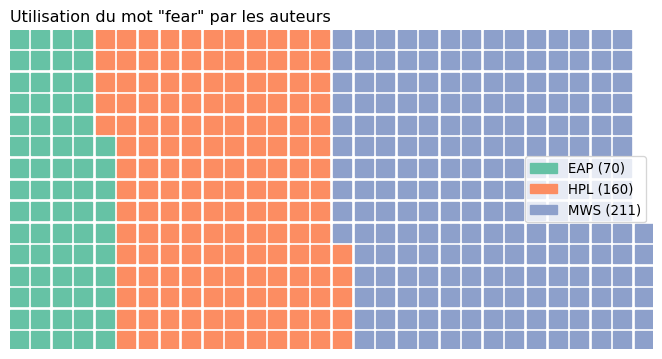

On remarque ainsi de manière très intuitive
le déséquilibre de notre jeu de données
lorsqu’on se focalise sur le terme *“peur”*
où Mary Shelley représente près de 50%
des observations.

Si on reproduit cette analyse avec le terme *“horror”*, on peut
en conclure que la peur est plus évoquée par Mary Shelley
(sentiment assez naturel face à la créature du docteur Frankenstein) alors
que Lovecraft n’a pas volé sa réputation d’écrivain de l’horreur !

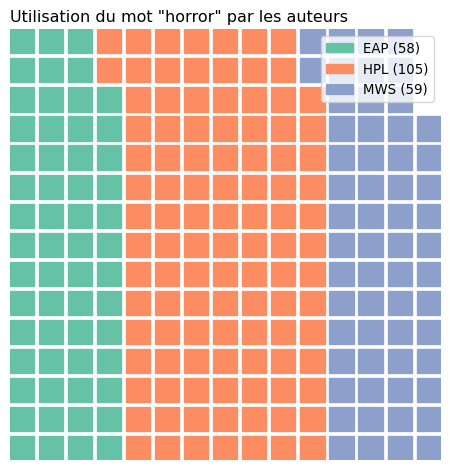

# Premier *wordcloud*

Pour aller plus loin dans l’analyse du champ lexical de chaque auteur,
on peut représenter un `wordcloud` qui permet d’afficher chaque mot avec une
taille proportionnelle au nombre d’occurrence de celui-ci.

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 3 : Wordcloud</h3>

1.  En utilisant la fonction `wordCloud`, faire trois nuages de mot pour représenter les mots les plus utilisés par chaque auteur.
2.  Calculer les 25 mots plus communs pour chaque auteur et représenter les trois histogrammes des décomptes.

</div>

Le *wordcloud* pour nos différents auteurs est le suivant:

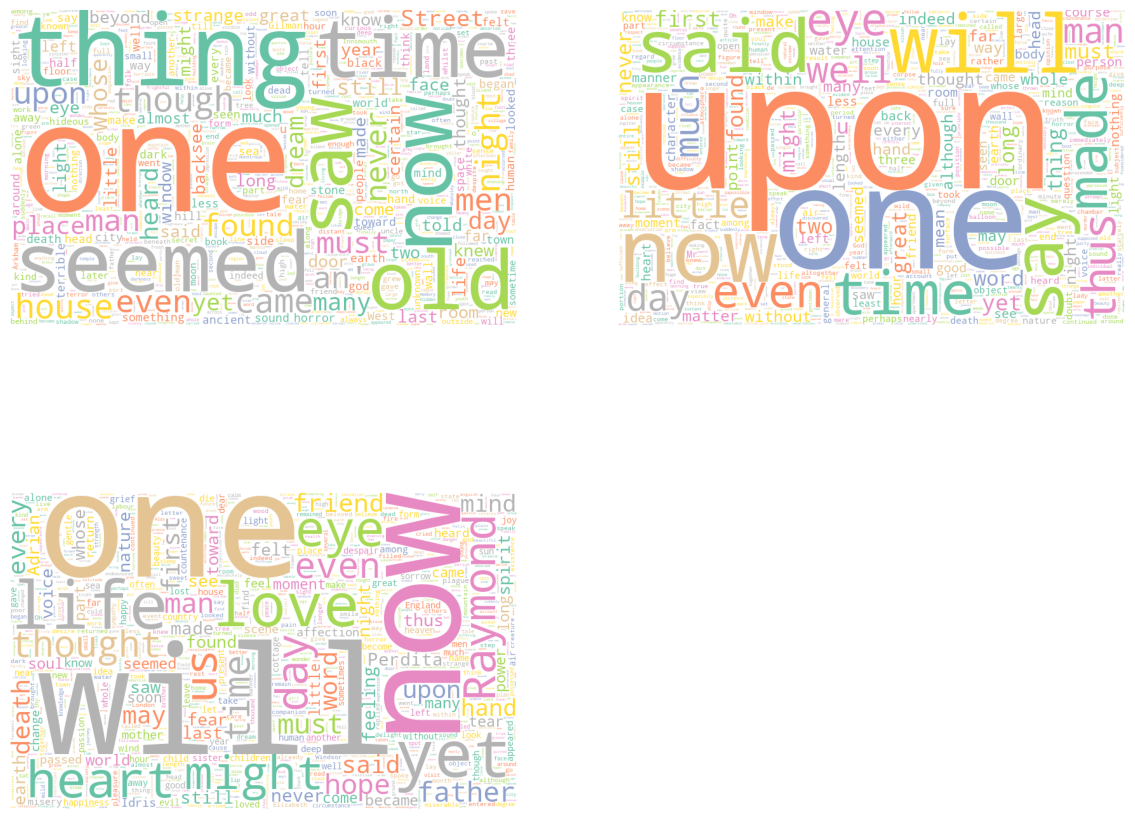

Enfin, si on fait un histogramme des fréquences,
cela donnera :

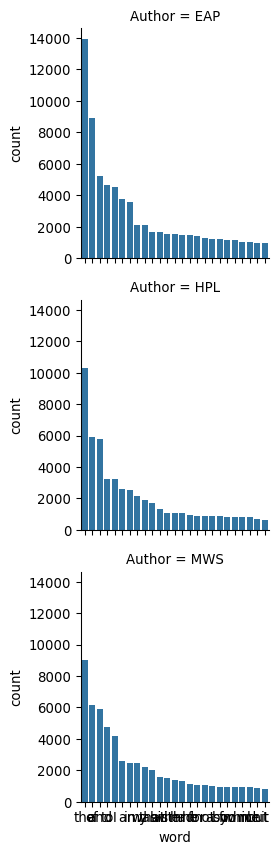

On voit ici que ce sont des mots communs, comme *“the”*, *“of”*, etc. sont très
présents. Mais ils sont peu porteurs d’information, on peut donc les éliminer
avant de faire une analyse syntaxique poussée.
Ceci est une démonstration par l’exemple qu’il vaut mieux nettoyer le texte avant de
l’analyser (sauf si on est intéressé
par la loi de Zipf, cf. exercice suivant).

## Aparté: la loi de Zipf

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #ffc10780;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> La loi de Zipf</h3>

Dans son sens strict, la loi de Zipf prévoit que
dans un texte donné, la fréquence d’occurrence $f(n_i)$ d’un mot est
liée à son rang $n_i$ dans l’ordre des fréquences par une loi de la forme
$f(n_i) = c/n_i$ où $c$ est une constante. Zipf, dans les années 1930, se basait sur l’oeuvre
de Joyce, *Ulysse* pour cette affirmation.

Plus généralement, on peut dériver la loi de Zipf d’une distribution exponentielle des fréquences: $f(n_i) = cn_{i}^{-k}$. Cela permet d’utiliser la famille des modèles linéaires généralisés, notamment les régressions poissonniennes, pour mesurer les paramètres de la loi. Les modèles linéaire traditionnels en `log` souffrent en effet, dans ce contexte, de biais (la loi de Zipf est un cas particulier d’un modèle gravitaire, où appliquer des OLS est une mauvaise idée, cf. [Galiana et al. (2020)](https://linogaliana.netlify.app/publication/2020-segregation/) pour les limites).

</div>

Un modèle exponentiel peut se représenter par un modèle de Poisson ou, si
les données sont très dispersées, par un modèle binomial négatif. Pour
plus d’informations, consulter l’annexe de Galiana et al. (2020).
La technique économétrique associée pour l’estimation est
les modèles linéaires généralisés (GLM) qu’on peut
utiliser en `Python` via le
package \`statsmodels\``{=html} <a name="cite_note-3"></a>3. [^](#cite_ref-3)`

La littérature sur les modèles gravitaires, présentée dans Galiana et al. (2020),
donne quelques arguments pour privilégier les modèles GLM à des modèles log-linéaires
estimés par moindres carrés ordinaires.

$$
\mathbb{E}\bigg( f(n_i)|n_i \bigg) = \exp(\beta_0 + \beta_1 \log(n_i))
$$

Prenons les résultats de l’exercice précédent et enrichissons les du rang et de la fréquence d’occurrence d’un mot :

In [23]:
count_words = pd.DataFrame({'counter' : train
    .groupby('Author')
    .apply(lambda s: ' '.join(s['Text']).split())
    .apply(lambda s: Counter(s))
    .apply(lambda s: s.most_common())
    .explode()}
)
count_words[['word','count']] = pd.DataFrame(count_words['counter'].tolist(), index=count_words.index)
count_words = count_words.reset_index()

count_words = count_words.assign(
    tot_mots_auteur = lambda x: (x.groupby("Author")['count'].transform('sum')),
    freq = lambda x: x['count'] /  x['tot_mots_auteur'],
    rank = lambda x: x.groupby("Author")['count'].transform('rank', ascending = False)
)

Commençons par représenter la relation entre la fréquence et le rang:

Nous avons bien, graphiquement, une relation log-linéaire entre les deux:

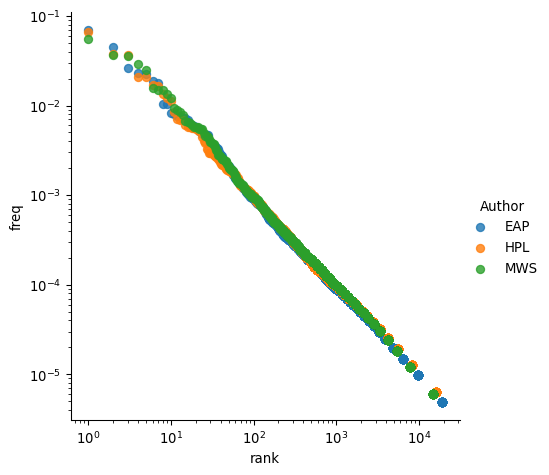

In [25]:
g.figure.get_figure()

Avec `statsmodels`, vérifions plus formellement cette relation:

In [26]:
import statsmodels.api as sm

exog = sm.add_constant(np.log(count_words['rank'].astype(float)))

model = sm.GLM(count_words['freq'].astype(float), exog, family = sm.families.Poisson()).fit()

# Afficher les résultats du modèle
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   freq   No. Observations:                69301
Model:                            GLM   Df Residuals:                    69299
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.011
Date:                Sun, 12 Feb 2023   Deviance:                     0.065676
Time:                        16:00:20   Pearson chi2:                   0.0656
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0002431
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4388      1.089     -2.239      0.0

Le coefficient de la régression est presque 1 ce qui suggère bien une relation
quasiment log-linéaire entre le rang et la fréquence d’occurrence d’un mot.
Dit autrement, le mot le plus utilisé l’est deux fois plus que le deuxième
mois le plus fréquent qui l’est trois plus que le troisième, etc.

# Nettoyage d’un texte

Les premières étapes dans le nettoyage d’un texte, qu’on a
développé au cours du [chapitre précédent](#nlp), sont :

-   suppression de la ponctuation
-   suppression des *stopwords*

Cela passe par la tokenisation d’un texte, c’est-à-dire la décomposition
de celui-ci en unités lexicales (les *tokens*).
Ces unités lexicales peuvent être de différentes natures,
selon l’analyse que l’on désire mener.
Ici, on va définir les tokens comme étant les mots utilisés.

Plutôt que de faire soi-même ce travail de nettoyage,
avec des fonctions mal optimisées,
on peut utiliser la librairie `nltk` comme détaillé [précédemment](#nlp).

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 4 : Nettoyage du texte</h3>

Repartir de `train`, notre jeu de données d’entraînement. Pour rappel, `train` a la structure suivante:

1.  Tokeniser chaque phrase avec `nltk`.
2.  Retirer les stopwords avec `nltk`.

</div>

Pour rappel, au début de l’exercice, le `DataFrame` présente l’aspect suivant:

Après tokenisation, il devrait avoir cet aspect :

ID     Author
00001  MWS       [Idris, was, well, content, with, this, resolv...
00002  HPL       [I, was, faint, even, fainter, than, the, hate...
dtype: object

Après le retrait des stopwords, cela donnera:

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #ffc10780;">
<h3 class="alert-heading"><i class="fa fa-lightbulb-o"></i> Hint</h3>

La méthode `apply` est très pratique ici car nous avons une phrase par ligne. Plutôt que de faire un `DataFrame` par auteur, ce qui n’est pas une approche très flexible, on peut directement appliquer la tokenisation
sur notre `DataFrame` grâce à `apply`, sans le diviser.

</div>

Ce petit nettoyage permet d’arriver à un texte plus intéressant en termes d’analyse lexicale. Par exemple, si on reproduit l’analyse précédente… :

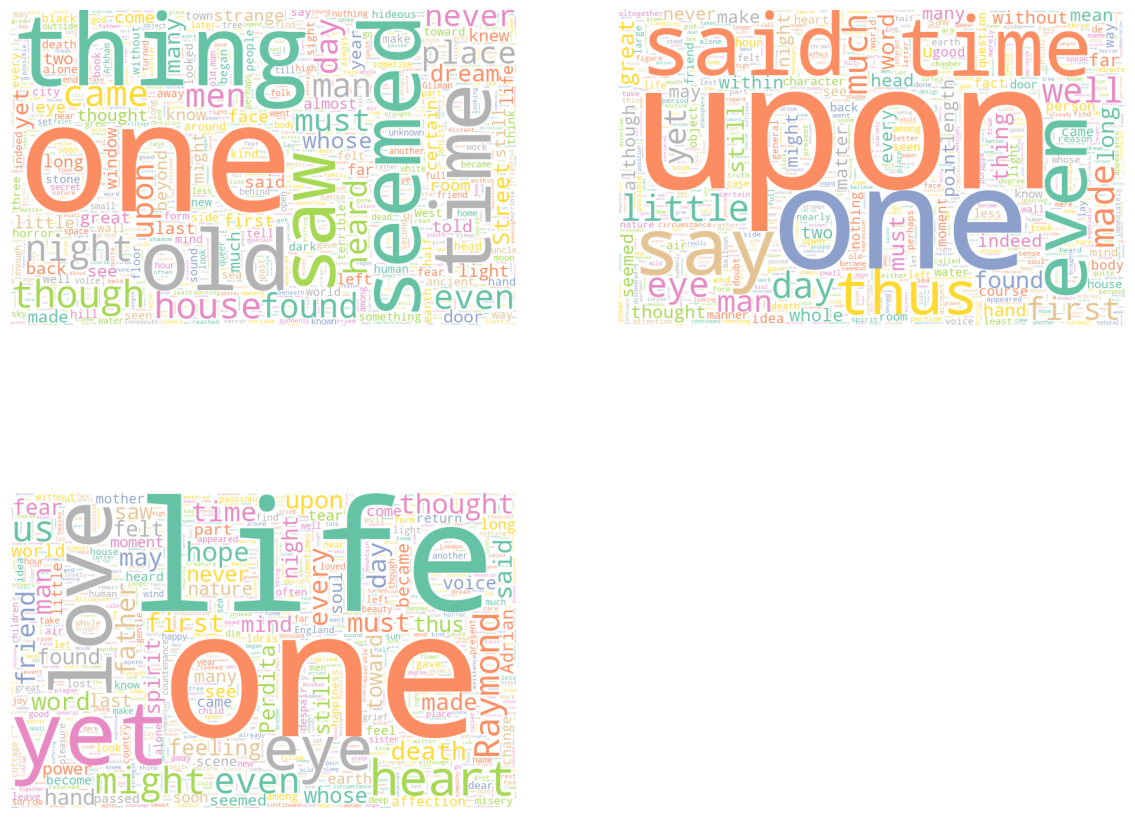

Pour aller plus loin dans l’harmonisation d’un texte, il est possible de
mettre en place les classes d’équivalence développées dans la
[partie précédente](#nlp) afin de remplacer différentes variations d’un même
mot par une forme canonique :

-   la **racinisation** (*stemming*) assez fruste mais rapide, notamment
    en présence de fautes d’orthographe. Dans ce cas, *chevaux* peut devenir *chev*
    mais être ainsi confondu avec *chevet* ou *cheveux*.
    Cette méthode est généralement plus simple à mettre en oeuvre, quoique
    plus fruste.

-   la **lemmatisation** qui requiert la connaissance des statuts
    grammaticaux (exemple : *chevaux* devient *cheval*).
    Elle est mise en oeuvre, comme toujours avec `nltk`, à travers un
    modèle. En l’occurrence, un `WordNetLemmatizer` (WordNet est une base
    lexicographique ouverte). Par exemple, les mots *“women”*, *“daughters”*
    et *“leaves”* seront ainsi lemmatisés de la manière suivante :

In [32]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

for word in ["women","daughters", "leaves"]:
    print("The lemmatized form of %s is: {}".format(lemm.lemmatize(word)) % word)

The lemmatized form of women is: woman
The lemmatized form of daughters is: daughter
The lemmatized form of leaves is: leaf

<div class="alert alert-info" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #007bff80;">
<h3 class="alert-heading"><i class="fa fa-comment"></i> Note</h3>

Pour disposer du corpus nécessaire à la lemmatisation, il faut, la première fois,
télécharger celui-ci grâce aux commandes suivantes:

``` python
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
```

</div>

On va se restreindre au corpus d’Edgar Allan Poe et repartir de la base de données
brute:

In [33]:
eap_clean = train[train["Author"] == "EAP"]
eap_clean = ' '.join(eap_clean['Text'])
#Tokenisation naïve sur les espaces entre les mots => on obtient une liste de mots
#tokens = eap_clean.split()
word_list = nltk.word_tokenize(eap_clean)

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #ffc10780;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 5 : Lemmatisation avec nltk</h3>

Utiliser un `WordNetLemmatizer` et observer le résultat.

Optionnel: Effectuer la même tâche avec `spaCy`

</div>

Le `WordNetLemmatizer` donnera le résultat suivant:

# TF-IDF: calcul de fréquence

Le calcul [tf-idf](https://fr.wikipedia.org/wiki/TF-IDF) (term *frequency–inverse document frequency*)
permet de calculer un score de proximité entre un terme de recherche et un
document (c’est ce que font les moteurs de recherche).

-   La partie `tf` calcule une fonction croissante de la fréquence du terme de recherche dans le document à l’étude ;
-   La partie `idf` calcule une fonction inversement proportionnelle à la fréquence du terme dans l’ensemble des documents (ou corpus).

Le score total, obtenu en multipliant les deux composantes,
permet ainsi de donner un score d’autant plus élevé que le terme est surréprésenté dans un document
(par rapport à l’ensemble des documents).
Il existe plusieurs fonctions, qui pénalisent plus ou moins les documents longs,
ou qui sont plus ou moins *smooth*.

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 6 : TF-IDF: calcul de fréquence</h3>

1.  Utiliser le vectoriseur TF-IdF de `scikit-learn` pour transformer notre corpus en une matrice `document x terms`. Au passage, utiliser l’option `stop_words` pour ne pas provoquer une inflation de la taille de la matrice. Nommer le modèle `tfidf` et le jeu entraîné `tfs`.
2.  Après avoir construit la matrice de documents x terms avec le code suivant, rechercher les lignes où les termes ayant la structure `abandon` sont non-nuls.
3.  Trouver les 50 extraits où le score TF-IDF est le plus élevé et l’auteur associé. Vous devriez obtenir le classement suivant:

</div>

In [36]:
feature_names = tfidf.get_feature_names_out()
corpus_index = [n for n in list(tfidf.vocabulary_.keys())]
import pandas as pd
df = pd.DataFrame(tfs.todense(), columns=feature_names)

df.head()

5 rows × 24937 columns

Les lignes où les termes de abandon sont non nuls
sont les suivantes :

Int64Index([    4,   116,   215,   571,   839,  1042,  1052,  1069,  2247,
             2317,  2505,  3023,  3058,  3245,  3380,  3764,  3886,  4425,
             5289,  5576,  5694,  6812,  7500,  9013,  9021,  9077,  9560,
            11229, 11395, 11451, 11588, 11827, 11989, 11998, 12122, 12158,
            12189, 13666, 15259, 16516, 16524, 16759, 17547, 18019, 18072,
            18126, 18204, 18251],
           dtype='int64')

5 rows × 24937 columns

Author
MWS    22
HPL    15
EAP    13
Name: Text, dtype: int64

Les 10 scores les plus élevés sont les suivants :

In [39]:
print(train.iloc[list_fear[:9]]['Text'].values)

['We could not fear we did not.' '"And now I do not fear death.'
 'Be of heart and fear nothing.' 'I smiled, for what had I to fear?'
 'Indeed I had no fear on her account.'
 'I have not the slightest fear for the result.'
 'At length, in an abrupt manner she asked, "Where is he?" "O, fear not," she continued, "fear not that I should entertain hope Yet tell me, have you found him?'
 '"I fear you are right there," said the Prefect.'
 'I went down to open it with a light heart, for what had I now to fear?']

On remarque que les scores les plus élévés sont soient des extraits courts où le mot apparait une seule fois, soit des extraits plus longs où le mot fear apparaît plusieurs fois.

<div class="alert alert-info" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #007bff80;">
<h3 class="alert-heading"><i class="fa fa-comment"></i> Note</h3>

La matrice `document x terms` est un exemple typique de matrice *sparse* puisque, dans des corpus volumineux, une grande diversité de vocabulaire peut être trouvée.

</div>

# Approche contextuelle: les *n-gramms*

Pour être en mesure de mener cette analyse, il est nécessaire de télécharger un corpus supplémentaire :

In [40]:
import nltk
nltk.download('genesis')
nltk.corpus.genesis.words('english-web.txt')

[nltk_data] Downloading package genesis to /github/home/nltk_data...
[nltk_data]   Package genesis is already up-to-date!

['In', 'the', 'beginning', 'God', 'created', 'the', ...]

Il s’agit maintenant de raffiner l’analyse.

On s’intéresse non seulement aux mots et à leur fréquence, mais aussi aux mots qui suivent. Cette approche est essentielle pour désambiguiser les homonymes. Elle permet aussi d’affiner les modèles “bag-of-words”. Le calcul de n-grams (bigrams pour les co-occurences de mots deux-à-deux, tri-grams pour les co-occurences trois-à-trois, etc.) constitue la méthode la plus simple pour tenir compte du contexte.

`nltk` offre des methodes pour tenir compte du contexte : pour ce faire, nous calculons les n-grams, c’est-à-dire l’ensemble des co-occurrences successives de mots n-à-n. En général, on se contente de bi-grams, au mieux de tri-grams :

-   les modèles de classification, analyse du sentiment, comparaison de documents, etc. qui comparent des n-grams avec n trop grands sont rapidement confrontés au problème de données sparse, cela réduit la capacité prédictive des modèles ;
-   les performances décroissent très rapidement en fonction de n, et les coûts de stockage des données augmentent rapidement (environ n fois plus élevé que la base de données initiale).

On va, rapidement, regarder dans quel contexte apparaît le mot `fear` dans
l’oeuvre d’Edgar Allan Poe (EAP). Pour cela, on transforme d’abord
le corpus EAP en tokens \`nltk :

In [41]:
eap_clean = train[train["Author"] == "EAP"]
eap_clean = ' '.join(eap_clean['Text'])
tokens = eap_clean.split()
print(tokens[:10])
text = nltk.Text(tokens)
print(text)

['This', 'process,', 'however,', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the']
<Text: This process, however, afforded me no means of...>

Vous aurez besoin des fonctions `BigramCollocationFinder.from_words` et `BigramAssocMeasures.likelihood_ratio` :

In [42]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 7  : n-grams et contexte du mot fear</h3>

1.  Utiliser la méthode `concordance` pour afficher le contexte dans lequel apparaît le terme `fear`.
2.  Sélectionner et afficher les meilleures collocation, par exemple selon le critère du ratio de vraisemblance.

Lorsque deux mots sont fortement associés, cela est parfois dû au fait qu’ils apparaissent rarement. Il est donc parfois nécessaire d’appliquer des filtres, par exemple ignorer les bigrammes qui apparaissent moins de 5 fois dans le corpus.

1.  Refaire la question précédente en utilisant toujours un modèle `BigramCollocationFinder` suivi de la méthode `apply_freq_filter` pour ne conserver que les bigrammes présents au moins 5 fois. Puis, au lieu d’utiliser la méthode de maximum de vraisemblance, testez la méthode `nltk.collocations.BigramAssocMeasures().jaccard`.

2.  Ne s’intéresser qu’aux *collocations* qui concernent le mot *fear*

</div>

Avec la méthode `concordance` (question 1),
la liste devrait ressembler à celle-ci:

Exemples d'occurences du terme 'fear' :
Displaying 13 of 13 matches:
d quick unequal spoken apparently in fear as well as in anger. What he said wa
hutters were close fastened, through fear of robbers, and so I knew that he co
to details. I even went so far as to fear that, as I occasioned much trouble, 
years of age, was heard to express a fear "that she should never see Marie aga
ich must be entirely remodelled, for fear of serious accident I mean the steel
 my arm, and I attended her home. 'I fear that I shall never see Marie again.'
clusion here is absurd. "I very much fear it is so," replied Monsieur Maillard
bt of ultimately seeing the Pole. "I fear you are right there," said the Prefe
er occurred before.' Indeed I had no fear on her account. For a moment there w
erhaps so," said I; "but, Legrand, I fear you are no artist. It is my firm int
 raps with a hammer. Be of heart and fear nothing. My daughter, Mademoiselle M
e splendor. I have not the slightest fear for the result. The 

Même si on peut facilement voir le mot avant et après, cette liste est assez difficile à interpréter car elle recoupe beaucoup d’informations.

La `collocation` consiste à trouver les bi-grammes qui
apparaissent le plus fréquemment ensemble. Parmi toutes les paires de deux mots observées,
il s’agit de sélectionner, à partir d’un modèle statistique, les “meilleures”.
On obtient donc avec cette méthode (question 2):

Si on modélise les meilleures collocations:

Cette liste a un peu plus de sens,
on a des noms de personnages, de lieux mais aussi des termes fréquemment employés ensemble
(*Chess Player* par exemple).

En ce qui concerne les *collocations* du mot fear:

Si on mène la même analyse pour le terme *love*, on remarque que de manière logique, on retrouve bien des sujets généralement accolés au verbe :

In [47]:
collocations_word("love")

[('love', 'me'), ('love', 'he'), ('will', 'love'), ('I', 'love'), ('love', ','), ('you', 'love'), ('the', 'love')]

# Références

Galiana, Lino, and Milena Suarez Castillo. 2022. “Fuzzy Matching on Big-Data an Illustration with Scanner Data and Crowd-Sourced Nutritional Data.”

Galiana, Lino, François Sémécurbe, Benjamin Sakarovitch, and Zbigniew Smoreda. 2020. “Residential Segregation, Daytime Segregation and Spatial Frictions: An Analysis from Mobile Phone Data.”